https://code.kx.com/q/interfaces/pyq/install/ -- Done

https://youtu.be/v2UoP0l6mOw --Working here on this

In [1]:
import matplotlib
from pyq import q 
from pyq import K

In [2]:
import os
os.getcwd()

'/Users/jvsingh/work/github/kdb-q'

In [3]:
%q 

1 + 5

6

In [4]:
x = %q  1 + 2

In [5]:
x

3

In [7]:
%q \p

1024i

In [8]:
%q \a

`symbol$()

Start a session on your machine listening to port 5000. And connect to it form here. This notebook becomes client of another q server listening at port 5000.


In [17]:
%%q

h:hopen `::5000

In [18]:
%q h "a:6*7"

::

In [24]:
python_a = %q h "a"
python_a

42

In [25]:
res = %q h ({x+y}; 6;12 )
res

18

Start a q session on some other place and connect to this notebook(underlying q kernel) as server. This notebook becomes a Server listening at 4444

In [30]:
%%q

\p 4444

##### On some terminal session or a client, you can connect to this notebook session of q 
** (this ntebook is like server)**

(base) jvsingh: ~  -> q


KDB+ 4.0 2020.03.17 Copyright (C) 1993-2020 Kx Systems

m64/ 6(16)core 32768MB xxxxx jais-mac-mini-2.local 127.0.0.1 EXPIRE xxxxx KOD

q)h:hopen `::4444

q)h "jupytervar:10*5"

q)

In [32]:
%%q

jupytervar

50

Coming back to youtube video:
    

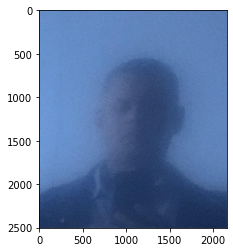

In [35]:
from matplotlib import pyplot as plt
img = plt.imread("/Users/jvsingh/Desktop/jai_blur.jpg")

plt.imshow(img)

In [36]:
%q read1`:/Users/jvsingh/Desktop/jai_blur.jpg

0xffd8ffe000104a46494600010100000100010000ffe1002a45786966000049492a000800000..

but since it is compressed, it is not very useful

In [37]:
def read_image(path):
    path = str(path).lstrip(':')
    x = plt.imread(path)
    return(K(x))

ir = q('{x enlist y}', read_image)
q.set('.im.read', ir)

`.im.read

In [214]:
#Discovered after some hard work that K also belongs to pyq

In [39]:
%q .im.read`:/Users/jvsingh/Desktop/jai_blur.jpg

0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658d..
0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658d..
0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658dc8 0x658d..
0x668ec9 0x668ec9 0x668ec9 0x668ec9 0x668ec9 0x668ec9 0x668ec9 0x668ec9 0x658d..
0x668ec9 0x668ec9 0x668ec9 0x668ec9 0x668ec9 0x668ec9 0x668ec9 0x668ec9 0x658d..
0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x658d..
0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x658d..
0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x678fca 0x658d..
0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x6790..
0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x6790..
0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x668fc7 0x6790..
0x6790c8 0x6790c8 0x6790c8 0x6790c8 0x6790c8 0x6790c8 0x6790c8 0x6790c8 0x6790..
0x6790c8 0x6790c8 0x6790c8 0

In [40]:
#Is it fast: print time in millisec

%q \t .im.read`:/Users/jvsingh/Desktop/jai_blur.jpg

430

In [41]:
%time img = plt.imread('/Users/jvsingh/Desktop/jai_blur.jpg')

CPU times: user 45.7 ms, sys: 3.93 ms, total: 49.6 ms
Wall time: 48.7 ms


In [42]:
q.flat = img.flatten()
q.shape = img.shape
%q \t shape #flat

257

## Make it a library

im.p contents:

```python

from matplotlib import pyplot as plt
from pyq import q 
from pyq import K

def read_image(path):
    path = str(path).lstrip(':')
    x = plt.imread(path)
    return(K(x))

r = q('{x enlist y}', read_image)
q.set('.im.read', r)


def save_image(path, image):
    path = str(path).lstrip(':')
    plt.imsave(path, image)

q.set('.im.save', save_image)
q).q.imsave:{.im.save(x;y)}  

```

In [228]:
%%q -l im.p
img:.im.read`:jai_blur.jpg
`:jai_blur.bmp imsave img

In [229]:
img2 = %q flip reverse img

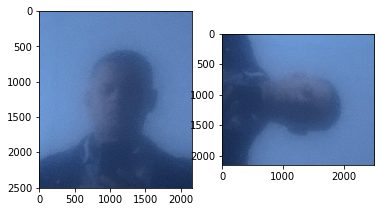

In [230]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img)
ax2.imshow(img2)

#### Python and q are in one process

In [43]:
os.getpid(), q('.z.i, .z.f')

(6075, 6075i
`/Users/jvsingh/anaconda3/q/pyq-kernel.p)

####  Also, A kdb+ port is open

In [44]:
%q \p

4444i

In [45]:
q.til(10)

0 1 2 3 4 5 6 7 8 9

In [46]:
q.til(10) << 3

3 4 5 6 7 8 9 0N 0N 0N

In [48]:
q.til(10) >> 3

0N 0N 0N 0 1 2 3 4 5 6

### Apply/Compose Operator

In [49]:
q.til @ 5

0 1 2 3 4

In [50]:
dot = q.sum @ q('*')
dot([1, 2, 3, [3, 2, 1]])

sum*[(1;2;3;3 2 1)]

### Typed constructors and casts

In [51]:
colors = K(['white', 'blue', 'red'])

colors

`white`blue`red

In [52]:
K.string(["AAA BB", "CCCC dd"])

"AAA BB"
"CCCC dd"

In [53]:
colors.string

"white"
"blue"
"red"

#### Special Values

In [241]:
for x in [K.int, K.float, K.date, K.timespan]:
    print(x.na, x.inf)

0Ni 0Wi
0n 0w
0Nd 0Wd
0Nn 0Wn


### Times, dates and timedeltas


In [242]:
import numpy

months = q('2000.01m + til 3')
numpy.array(months)

array(['2000-01', '2000-02', '2000-03'], dtype='datetime64[M]')

In [243]:
a = numpy.asarray(months.data)
a

array([0, 1, 2], dtype=int32)

In [244]:
a += 17*12
months

2017.01 2017.02 2017.03m

### More python to q conversions

#### Complex Numbers

In [245]:
q.z = [ 1 + 2j, 3 + 4j, 5+6j]
q.z

re im
-----
1  2 
3  4 
5  6

In [246]:
[complex(x) for x in q.z]

[(1+2j), (3+4j), (5+6j)]

In [247]:
import cmath
cmath.exp(q.z.first)

(-1.1312043837568135+2.4717266720048188j)

#### Path Objects

In [248]:
import pathlib
path = pathlib.Path('xyz')
q.set(path, 42)

`:xyz

In [249]:
q.get(path)

42

#### Named tuples

In [250]:
from collections import namedtuple
Point = namedtuple('Point', 'x,y')

In [251]:
q.point = Point(1,2)

In [252]:
%q point

x| 1
y| 2

In [253]:
q.points = [Point(1,2), Point(3,4), Point(5,6)]
%q points

x y
---
1 2
3 4
5 6

### Redesigned adverbs

In [254]:
K.over, q.over #I do not understand as I do not know q much

(/, k){x/y})

In [255]:
f = q('{(0,x)+x,0}') #I do not understand as I do not know q much

In [256]:
f.scan(6,1) #I do not understand as I do not know q much

1
1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1

In [257]:
f.over(6, 1)#I do not understand as I do not know q much

1 6 15 20 15 6 1